In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
dataset1 = pd.read_csv('deep.csv')
X = dataset1[['input']].values
y = dataset1[['output']].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [ ]:
class NeuralNet(nn.Module):
  def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 8)
        self.fc2 = nn.Linear(8, 10)
        self.fc3 = nn.Linear(10, 1)
        self.relu = nn.ReLU()
        self.history = {'loss': []}

  def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x




In [ ]:

ai_brain = NeuralNet()
criterion = nn.MSELoss()
optimizer = optim.RMSprop(ai_brain.parameters(), lr=0.001)



In [ ]:
# Name: Yogeshvar M
# Register Number: 212222230180
def train_model(ai_brain, X_train, y_train, criterion, optimizer, epochs=4000):
    # Write your code here
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = ai_brain(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        ai_brain.history['loss'].append(loss.item())
        if epoch % 200 == 0:
            print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.6f}')


In [ ]:
train_model(ai_brain, X_train_tensor, y_train_tensor, criterion, optimizer)

Epoch [0/4000], Loss: 0.014778
Epoch [200/4000], Loss: 0.014827
Epoch [400/4000], Loss: 0.014724
Epoch [600/4000], Loss: 0.014728
Epoch [800/4000], Loss: 0.014683
Epoch [1000/4000], Loss: 0.014385
Epoch [1200/4000], Loss: 0.014644
Epoch [1400/4000], Loss: 0.014805
Epoch [1600/4000], Loss: 0.014717
Epoch [1800/4000], Loss: 0.014885
Epoch [2000/4000], Loss: 0.015054
Epoch [2200/4000], Loss: 0.015013
Epoch [2400/4000], Loss: 0.014619
Epoch [2600/4000], Loss: 0.014841
Epoch [2800/4000], Loss: 0.015143
Epoch [3000/4000], Loss: 0.015241
Epoch [3200/4000], Loss: 0.015196
Epoch [3400/4000], Loss: 0.015351
Epoch [3600/4000], Loss: 0.015349
Epoch [3800/4000], Loss: 0.015086


In [ ]:
with torch.no_grad():
    test_loss = criterion(ai_brain(X_test_tensor), y_test_tensor)
    print(f'Test Loss: {test_loss.item():.6f}')



Test Loss: 5.400432


In [ ]:
loss_df = pd.DataFrame(ai_brain.history)

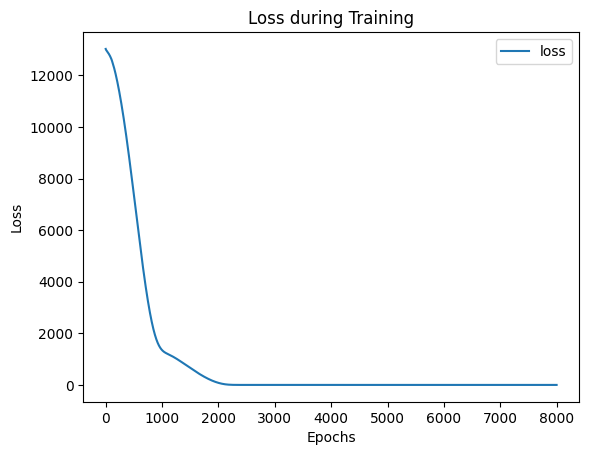

In [ ]:
import matplotlib.pyplot as plt
loss_df.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss during Training")
plt.show()

In [ ]:
X_n1_1 = torch.tensor([[9]], dtype=torch.float32)
prediction = ai_brain(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction: {prediction}')

Prediction: 91.10371398925781
